In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r'C:\Users\artoe\Documents\DataAnalytics\Data Immersion\Exercises\Achievement 6\data'

#### Prepare data for analysis

In [4]:
#import data
df_airbnb_complete = pd.read_csv(os.path.join(path,'listings_final.csv'), index_col=False)

In [5]:
df_airbnb_complete.columns

Index(['Unnamed: 0', 'id', 'listing_avg_price_year', 'name', 'street',
       'neighbourhood', 'city', 'latitude', 'longitude', 'room_type',
       'square_feet', 'availability_365', 'host_listings_count',
       'review_scores_rating', 'review_scores_location', 'review_scores_value',
       'review_scores_cleanliness', 'entire_home', 'private_room',
       'shared_room', 'distance_from_center'],
      dtype='object')

In [6]:
#creating a subset with data to be used 
df_sub = df_airbnb_complete[['listing_avg_price_year','review_scores_rating','review_scores_location','review_scores_value','review_scores_cleanliness','availability_365','distance_from_center', 'host_listings_count']]

In [7]:
df_sub.shape

(20030, 8)

In [8]:
df_sub.isnull().sum()

listing_avg_price_year       9344
review_scores_rating         2639
review_scores_location       2660
review_scores_value          2659
review_scores_cleanliness    2647
availability_365                0
distance_from_center            0
host_listings_count             0
dtype: int64

In [9]:
#the review score null rows can all be dropped for the purpose of this task, since they still make up only a small portion of the entire dataset
df_sub.dropna(inplace = True)

In [10]:
df_sub.shape
#the data is now only representing listings that are vacant for at least 1 day in the upcoming year, and have more than 0 reviews.

(9378, 8)

##### Checking scale of data

In [12]:
df_sub.describe()

,listing_avg_price_year,review_scores_rating,review_scores_location,review_scores_value,review_scores_cleanliness,availability_365,distance_from_center,host_listings_count
count,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000
mean,174.738892,95.209106,9.470996,9.185007,9.533163,110.070271,2.663088,2.954255
std,172.250034,5.976804,0.677383,0.734007,0.758316,118.029393,1.625358,14.944337
min,25.333333,20.000000,2.000000,2.000000,2.000000,1.000000,0.022259,1.000000
25%,105.616033,93.000000,9.000000,9.000000,9.000000,13.000000,1.620553,1.000000
50%,145.848178,97.000000,10.000000,9.000000,10.000000,60.000000,2.407557,1.000000
75%,201.234709,99.000000,10.000000,10.000000,10.000000,180.000000,3.238718,2.000000
max,8500.000000,100.000000,10.000000,10.000000,10.000000,365.000000,11.326607,208.000000


In [13]:
#calculate availability percent
df_sub['availability_percent'] = (df_sub['availability_365']/365)*100

In [14]:
#we can also multiply the distance from center by 1000 to show meters instead of km
df_sub['meters_from_center'] = df_sub['distance_from_center']*1000

In [15]:
df_sub['review_scores_location_100'] = df_sub['review_scores_location']*10

In [16]:
df_sub['review_scores_value_100'] = df_sub['review_scores_value']*10

In [17]:
df_sub['review_scores_cleanliness_100'] = df_sub['review_scores_cleanliness']*10

In [18]:
df_sub.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_avg_price_year,9378.0,174.738892,172.250034,25.333333,105.616033,145.848178,201.234709,8500.000000
review_scores_rating,9378.0,95.209106,5.976804,20.000000,93.000000,97.000000,99.000000,100.000000
review_scores_location,9378.0,9.470996,0.677383,2.000000,9.000000,10.000000,10.000000,10.000000
review_scores_value,9378.0,9.185007,0.734007,2.000000,9.000000,9.000000,10.000000,10.000000
review_scores_cleanliness,9378.0,9.533163,0.758316,2.000000,9.000000,10.000000,10.000000,10.000000
availability_365,9378.0,110.070271,118.029393,1.000000,13.000000,60.000000,180.000000,365.000000
distance_from_center,9378.0,2.663088,1.625358,0.022259,1.620553,2.407557,3.238718,11.326607
host_listings_count,9378.0,2.954255,14.944337,1.000000,1.000000,1.000000,2.000000,208.000000
availability_percent,9378.0,30.156239,32.336820,0.273973,3.561644,16.438356,49.315068,100.000000
meters_from_center,9378.0,2663.087590,1625.358378,22.258728,1620.553198,2407.556655,3238.718171,11326.606980


In [19]:
#drop columns outside scale range
df_sub.drop(columns=['review_scores_location','review_scores_value','review_scores_cleanliness'], inplace=True)

In [20]:
df_sub.drop(columns='distance_from_center', inplace=True)

#### Determining number of clusters

In [22]:
#determining the number of clusters using the elbow method
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [23]:
#calculate score
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]

In [24]:
score

[-25194619261.633827,
 -10685836197.965109,
 -4997130963.173303,
 -3103390350.981768,
 -2259374559.2945223,
 -1817348709.152563,
 -1433315940.3970215,
 -1274225664.896202,
 -1016059995.0864569]

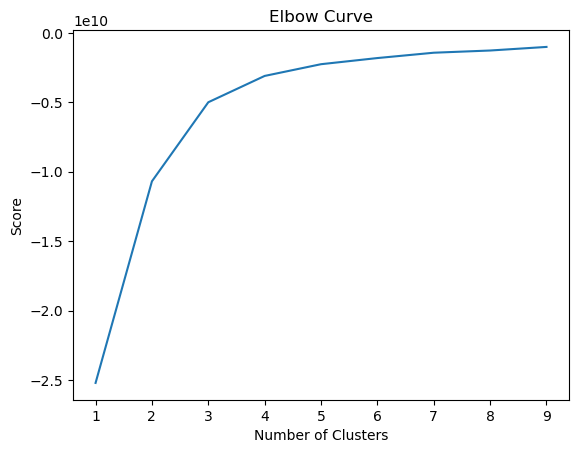

In [25]:
#plot the scores
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [26]:
#the "elbow" appears at 3 clusters

#### Apply clustering to data

In [28]:
kmeans = KMeans(n_clusters = 3)

In [29]:
kmeans.fit(df_sub)

KMeans(n_clusters=3)

In [30]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

In [31]:
#checking the cluster numbers and counts
df_sub['clusters'].head()

0    0
1    2
2    2
3    2
5    0
Name: clusters, dtype: int32

In [32]:
df_sub['clusters'].value_counts()

clusters
2    4646
0    4131
1     601
Name: count, dtype: int64

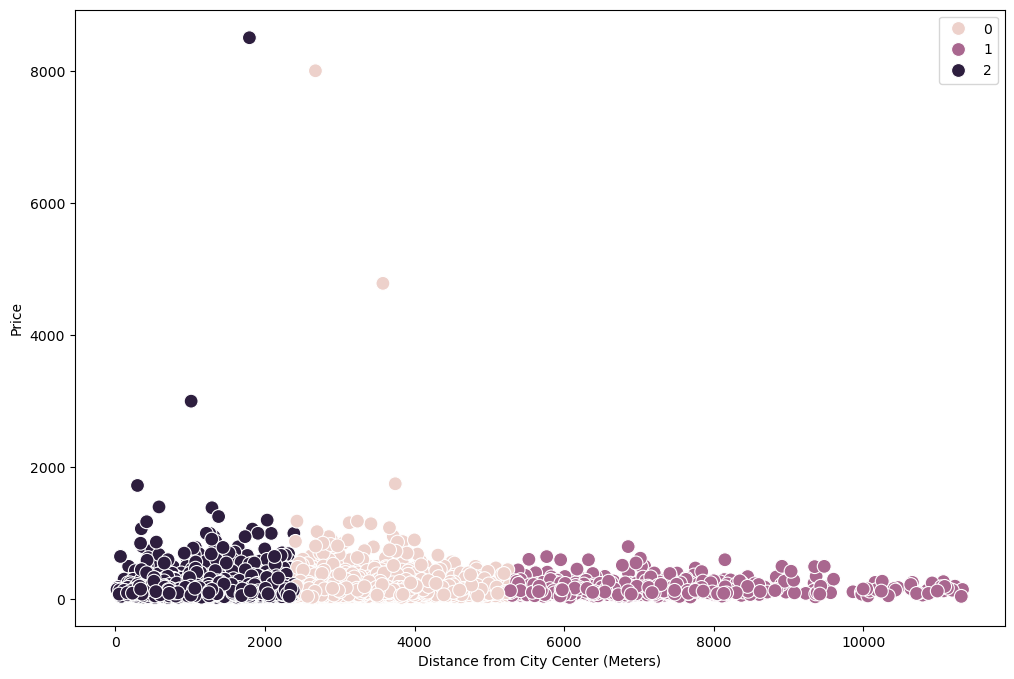

In [33]:
#plot the clusters for two variables: distance_from_center (x) and price (y)
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['meters_from_center'], y=df_sub['listing_avg_price_year'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Distance from City Center (Meters)') 
plt.ylabel('Price') 
plt.show()

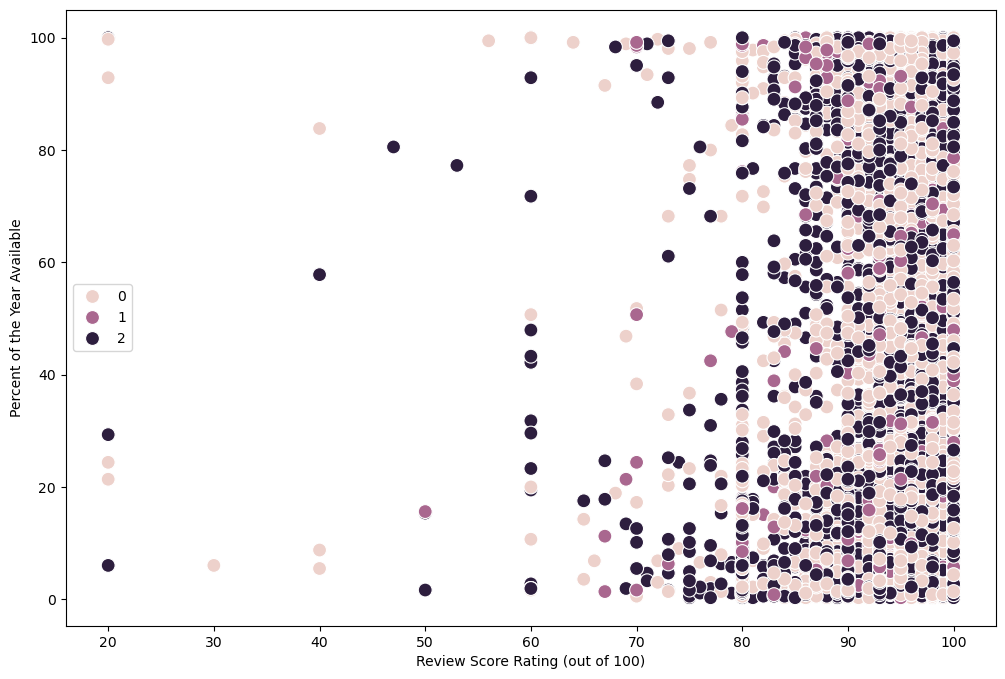

In [34]:
#plot the clusters for two variables: review score rating (x) and monthly_availability_percent (y)
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['review_scores_rating'], y=df_sub['availability_percent'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Review Score Rating (out of 100)') 
plt.ylabel('Percent of the Year Available') 
plt.show()

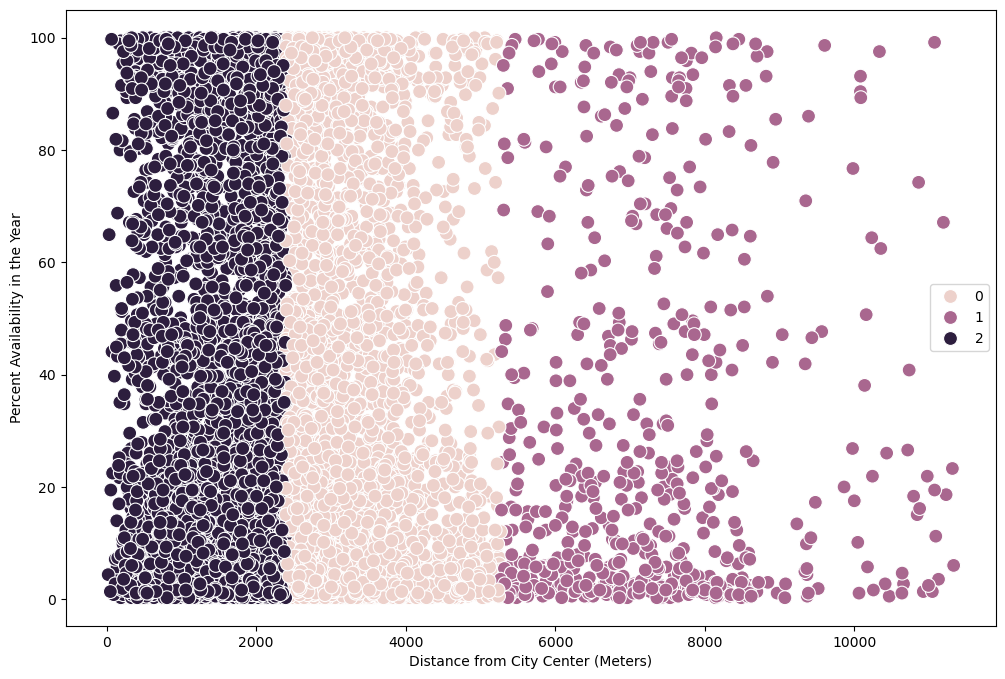

In [35]:
#plot the clusters for two variables: meters from center (x) and monthly_availability_percent (y)
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['meters_from_center'], y=df_sub['availability_percent'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Distance from City Center (Meters)') 
plt.ylabel('Percent Availability in the Year') 
plt.show()

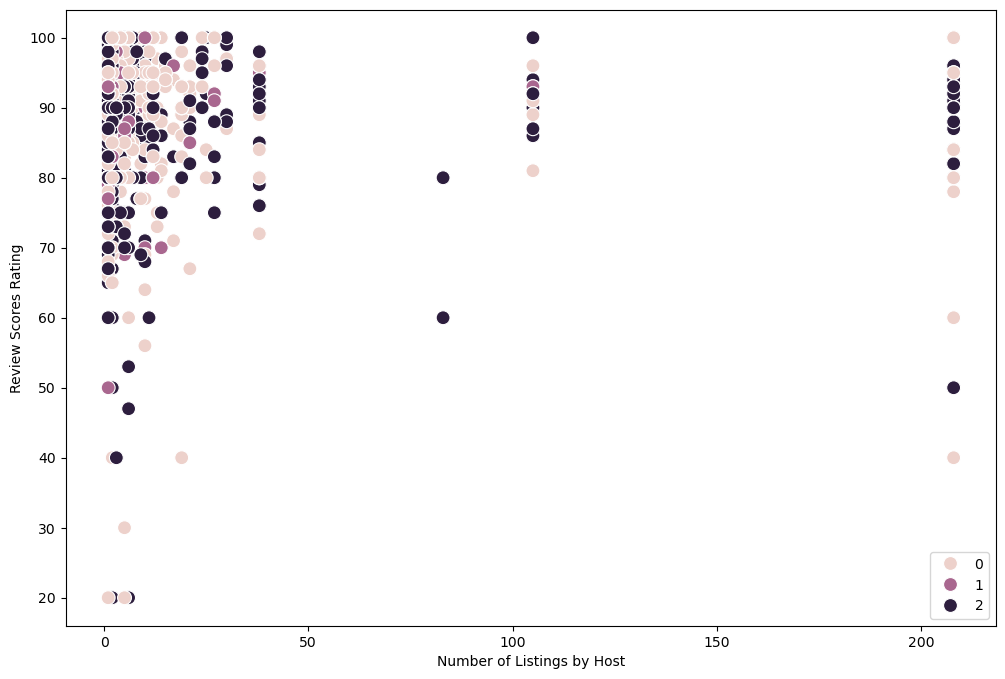

In [36]:
#plot clusters for review scores rating and host listings count
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['host_listings_count'], y=df_sub['review_scores_rating'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Number of Listings by Host') 
plt.ylabel('Review Scores Rating') 
plt.show()

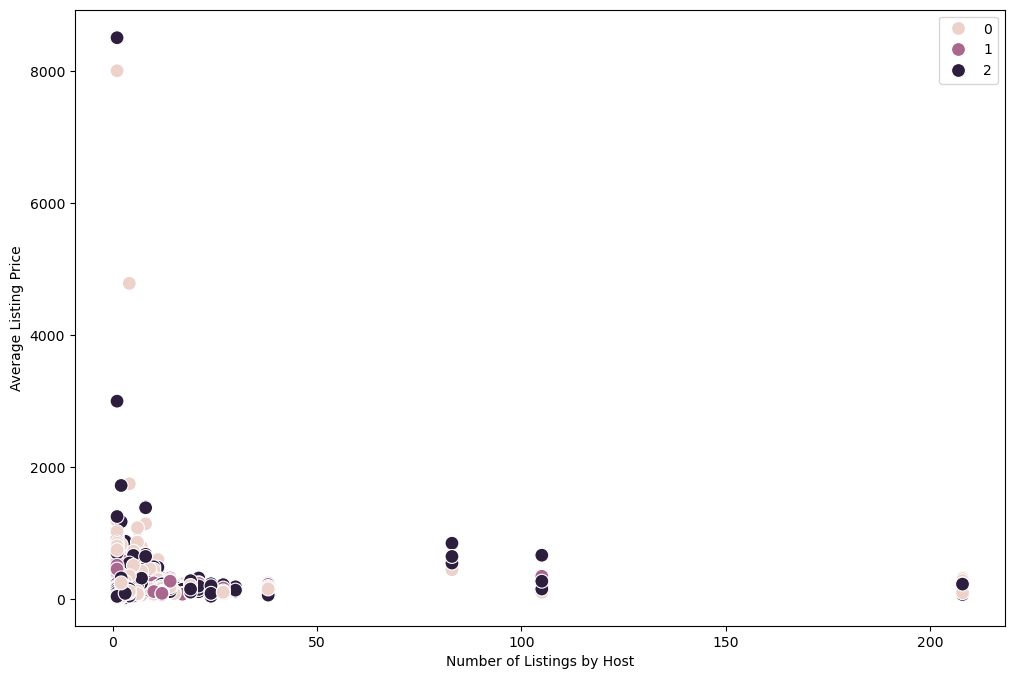

In [37]:
#plot clusters for price and host listings count
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['host_listings_count'], y=df_sub['listing_avg_price_year'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Number of Listings by Host') 
plt.ylabel('Average Listing Price') 
plt.show()

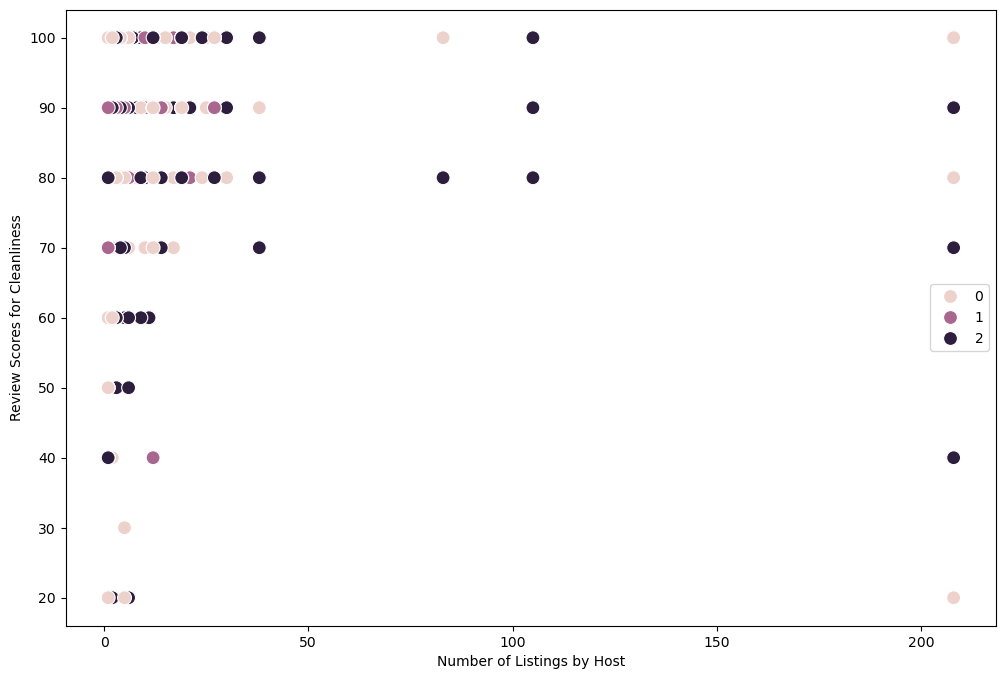

In [38]:
#plot clusters for review scores for cleanliness and host listings count
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['host_listings_count'], y=df_sub['review_scores_cleanliness_100'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Number of Listings by Host') 
plt.ylabel('Review Scores for Cleanliness') 
plt.show()

#### Grouping by cluster, getting descriptive stats

In [40]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'cluster2'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'cluster1'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'cluster0'

In [41]:
df_sub.groupby('cluster').agg({'listing_avg_price_year':['mean', 'median', 'min', 'max'], 
                         'review_scores_rating':['mean', 'median', 'min', 'max'], 
                         'availability_percent':['mean', 'median', 'min', 'max'],
                          'meters_from_center':['mean', 'median', 'min', 'max']}).T

cluster                           cluster0      cluster1     cluster2
listing_avg_price_year mean     175.069412    169.462147   175.127602
                       median   145.623955    140.684211   146.899428
                       min       26.514469     30.047619    25.333333
                       max     8000.000000    799.000000  8500.000000
review_scores_rating   mean      95.313241     94.820300    95.166810
                       median    97.000000     97.000000    97.000000
                       min       20.000000     50.000000    20.000000
                       max      100.000000    100.000000   100.000000
availability_percent   mean      30.014823     29.434048    30.375400
                       median    15.890411     15.616438    16.986301
                       min        0.273973      0.273973     0.273973
                       max      100.000000    100.000000   100.000000
meters_from_center     mean    3261.361779   7277.666352  1534.195530
                       median  3088.013709   7153.202037  1605.890884
                       min     2396.979978   5267.184572    22.258728
                       max     5266.973813  11326.606980  2396.801035

##### The clusters neatly sort two of the variables, price and distance from center, into distinct categories. Cluster 1 contains the highest mean price and lowest mean distance values, while cluster 0 contains the lowest price and highest distance values. This indicates a strong negative correlation between rental price and a listing's distance from the city center. 
##### Plotting price and distance from center shows that the highest price values are located closest to the city center. However, low price values can be found throughout all distance values. 
##### Monthly availability and review scores, however, do not fall into any distinct groups, indicating that these two variables are not influenced by each other, nor by price or distance from center. 

In [43]:
df_sub.to_csv(os.path.join(path, 'cluster_data.csv'))

In [44]:
df_sub.shape

(9378, 11)